#**Simple ANN (Art. Neural Net) Example - Stock Price Prediction**

C Kaligotla


### Loading Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

### Constants and Inputs

In [3]:
# Constants
STOCK_SYMBOL = "GOOG"
START_DATE = '2024-07-11'
END_DATE = '2025-07-11'
LOOKBACK_PERIOD = 5
EPOCHS = 10

### Download Data and Look at Raw Data

In [4]:
# Download Stock Data
Rawdata = yf.download(STOCK_SYMBOL, start=START_DATE, end=END_DATE)
print()
print(Rawdata.shape)
Rawdata

/tmp/ipython-input-4-3886202723.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Rawdata = yf.download(STOCK_SYMBOL, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed


(250, 5)


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2024-07-11,186.405121,191.490707,185.927418,190.425812,16452000
2024-07-12,185.887619,187.788497,185.250677,186.026950,14449100
2024-07-15,187.290863,188.992684,185.598988,185.598988,12186000
2024-07-16,184.613708,189.430580,184.235519,188.057184,12760100
2024-07-17,181.747467,184.344998,180.752245,183.797622,17376600
...,...,...,...,...,...
2025-07-03,180.550003,180.770004,178.190002,179.820007,13287400
2025-07-07,177.559998,180.339996,176.639999,180.134995,20991400


### Data PreProcessing: Reshape

In [5]:
# Reshape for compatibility with scaler
data = Rawdata['Close'].values.reshape(-1, 1)
data

array([[186.40512085],
       [185.88761902],
       [187.29086304],
       [184.6137085 ],
       [181.74746704],
       [178.36373901],
       [178.53289795],
       [182.47399902],
       [182.72279358],
       [173.53689575],
       [168.35179138],
       [167.87408447],
       [170.31237793],
       [171.03889465],
       [172.32270813],
       [171.62605286],
       [167.59541321],
       [159.87249756],
       [159.77296448],
       [159.98196411],
       [163.05718994],
       [164.59980774],
       [163.16668701],
       [165.13720703],
       [161.25584412],
       [162.39041138],
       [163.95291138],
       [167.59541321],
       [168.15275574],
       [166.82910156],
       [164.69932556],
       [166.63005066],
       [167.12767029],
       [165.58506775],
       [163.71405029],
       [162.61930847],
       [164.32115173],
       [157.85220337],
       [157.05601501],
       [157.84223938],
       [151.40315247],
       [149.0214386 ],
       [149.48980713],
       [151

### Data PreProcessing: Split into train-test

In [6]:
# Split the dataset into training and test sets
train_size = int(len(data) * 0.7)
data_train = data[:train_size]
data_test = data[train_size:]

In [7]:
print("Train:", data_train.shape)
print(data_train)
print("Test:", data_test.shape)
print(data_test)

Train: (175, 1)
[[186.40512085]
 [185.88761902]
 [187.29086304]
 [184.6137085 ]
 [181.74746704]
 [178.36373901]
 [178.53289795]
 [182.47399902]
 [182.72279358]
 [173.53689575]
 [168.35179138]
 [167.87408447]
 [170.31237793]
 [171.03889465]
 [172.32270813]
 [171.62605286]
 [167.59541321]
 [159.87249756]
 [159.77296448]
 [159.98196411]
 [163.05718994]
 [164.59980774]
 [163.16668701]
 [165.13720703]
 [161.25584412]
 [162.39041138]
 [163.95291138]
 [167.59541321]
 [168.15275574]
 [166.82910156]
 [164.69932556]
 [166.63005066]
 [167.12767029]
 [165.58506775]
 [163.71405029]
 [162.61930847]
 [164.32115173]
 [157.85220337]
 [157.05601501]
 [157.84223938]
 [151.40315247]
 [149.0214386 ]
 [149.48980713]
 [151.62237549]
 [155.00062561]
 [157.82081604]
 [158.43867493]
 [159.72419739]
 [160.25234985]
 [162.67393494]
 [164.06907654]
 [162.50453186]
 [163.07254028]
 [162.42480469]
 [163.2618866 ]
 [164.71682739]
 [166.61022949]
 [167.83596802]
 [166.72981262]
 [166.63017273]
 [167.97547913]
 [163.81

### Data PreProcessing: Scaling Data

In [8]:
# Scale Data
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training data and transform both training and test data
scaler.fit(data_train)
data_train_scaled = scaler.transform(data_train)
data_test_scaled = scaler.transform(data_test)
# Printing for understanding
print("Scaled Train:", data_train_scaled.shape)
print(data_train_scaled)
print("Scaled Test:", data_test_scaled.shape)
print(data_test_scaled)

Scaled Train: (175, 1)
[[0.64229699]
 [0.63340568]
 [0.65751512]
 [0.61151835]
 [0.56227285]
 [0.5041363 ]
 [0.50704266]
 [0.57475555]
 [0.57903014]
 [0.42120528]
 [0.3321189 ]
 [0.32391132]
 [0.36580415]
 [0.37828659]
 [0.40034406]
 [0.38837468]
 [0.31912341]
 [0.18643435]
 [0.18472425]
 [0.18831512]
 [0.24115123]
 [0.26765527]
 [0.24303252]
 [0.27688844]
 [0.21020192]
 [0.22969516]
 [0.25654081]
 [0.31912341]
 [0.32869923]
 [0.30595724]
 [0.26936511]
 [0.30253731]
 [0.31108702]
 [0.28458323]
 [0.25243688]
 [0.23362789]
 [0.26286762]
 [0.15172325]
 [0.13804377]
 [0.15155205]
 [0.04092073]
 [0.        ]
 [0.00804714]
 [0.04468725]
 [0.10272968]
 [0.15118397]
 [0.16179954]
 [0.18388637]
 [0.19296067]
 [0.23456644]
 [0.25853667]
 [0.23165589]
 [0.24141496]
 [0.23028608]
 [0.24466816]
 [0.26966581]
 [0.30219675]
 [0.32325643]
 [0.30425134]
 [0.3025394 ]
 [0.3256534 ]
 [0.25425604]
 [0.27668527]
 [0.23148444]
 [0.23353876]
 [0.25648208]
 [0.28781467]
 [0.29723136]
 [0.29449226]
 [0.2563106

### Visualizing train-test on raw and scaled data

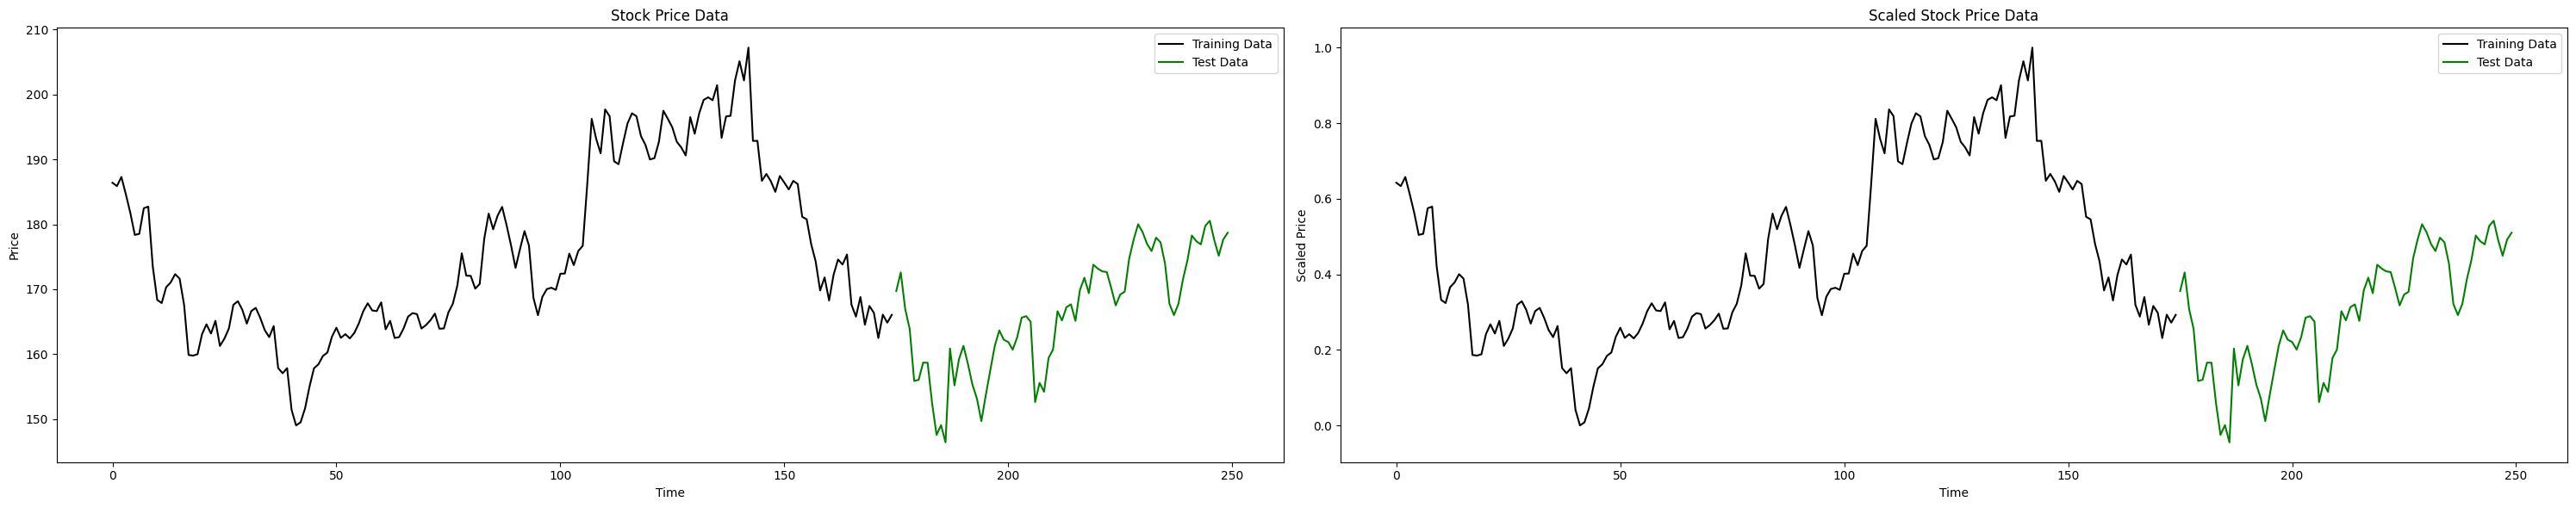

In [9]:
# Visualizing Data and Scaled Data side by side showing train-test split in time Series

# Create a figure with two subplots side by side
plt.figure(figsize=(30, 6))

# First subplot: Original Stock Price Data
plt.subplot(1, 2, 1)
plt.plot(np.arange(train_size), data_train, color="black", label="Training Data")
plt.plot(np.arange(train_size, len(data)), data_test, color="green", label="Test Data")
plt.title("Stock Price Data")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()

# Second subplot: Scaled Stock Price Data
plt.subplot(1, 2, 2)
plt.plot(np.arange(train_size), data_train_scaled, color="black", label="Training Data")
plt.plot(np.arange(train_size, len(data)), data_test_scaled, color="green", label="Test Data")
plt.title("Scaled Stock Price Data")
plt.xlabel("Time")
plt.ylabel("Scaled Price")
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### Prepare Training Data per Lookback Period

In [10]:
# Prepare training and test datasets
X_train, y_train = [], []

for i in range(len(data_train_scaled) - LOOKBACK_PERIOD - 1):
  X_train.append(data_train_scaled[i:(i + LOOKBACK_PERIOD), 0])
  y_train.append(data_train_scaled[i + LOOKBACK_PERIOD, 0])
# Convert to numpy arrays after appending elements
X_train, y_train = np.array(X_train), np.array(y_train)


Comparing training data vis-a-vis scaled data

In [11]:
# Print Scaled Data
print("Scaled Train Data \n", data_train_scaled)
#data_train_scaled.reshape(1, -1)

# X_Train on scaled data based on LOOKBACK_PERIOD
print("\n Lookback Period:",LOOKBACK_PERIOD)
print("\n X_train: \n",X_train.shape,"\n", X_train)
# y data
print("\n y_train: \n",y_train.shape,"\n", y_train)

Scaled Train Data 
 [[0.64229699]
 [0.63340568]
 [0.65751512]
 [0.61151835]
 [0.56227285]
 [0.5041363 ]
 [0.50704266]
 [0.57475555]
 [0.57903014]
 [0.42120528]
 [0.3321189 ]
 [0.32391132]
 [0.36580415]
 [0.37828659]
 [0.40034406]
 [0.38837468]
 [0.31912341]
 [0.18643435]
 [0.18472425]
 [0.18831512]
 [0.24115123]
 [0.26765527]
 [0.24303252]
 [0.27688844]
 [0.21020192]
 [0.22969516]
 [0.25654081]
 [0.31912341]
 [0.32869923]
 [0.30595724]
 [0.26936511]
 [0.30253731]
 [0.31108702]
 [0.28458323]
 [0.25243688]
 [0.23362789]
 [0.26286762]
 [0.15172325]
 [0.13804377]
 [0.15155205]
 [0.04092073]
 [0.        ]
 [0.00804714]
 [0.04468725]
 [0.10272968]
 [0.15118397]
 [0.16179954]
 [0.18388637]
 [0.19296067]
 [0.23456644]
 [0.25853667]
 [0.23165589]
 [0.24141496]
 [0.23028608]
 [0.24466816]
 [0.26966581]
 [0.30219675]
 [0.32325643]
 [0.30425134]
 [0.3025394 ]
 [0.3256534 ]
 [0.25425604]
 [0.27668527]
 [0.23148444]
 [0.23353876]
 [0.25648208]
 [0.28781467]
 [0.29723136]
 [0.29449226]
 [0.25631063]


### Prepare Test Data per Lookback Period

In [12]:
# Prepare test datasets
X_test, y_test = [], []

for i in range(len(data_test_scaled) - LOOKBACK_PERIOD - 1):
  X_test.append(data_test_scaled[i:(i + LOOKBACK_PERIOD), 0])
  y_test.append(data_test_scaled[i + LOOKBACK_PERIOD, 0])
# Convert to numpy arrays after appending elements
X_test, y_test = np.array(X_test), np.array(y_test)

Comparing testing dataset vis-a-vis scaled data


In [13]:
# Comparing testing dataset vis-a-vis raw data

# Scaled Data
print("Scaled Test Data \n", data_test_scaled)
#data_test_scaled.reshape(1, -1)

# X_test on scaled data based on LOOKBACK_PERIOD
print("\n Lookback Period:",LOOKBACK_PERIOD)
print("\n X_test: \n",X_test.shape,"\n", X_test)
# y data
print("\n y_test : \n",y_test.shape,"\n", y_test)

Scaled Test Data 
 [[ 0.35572917]
 [ 0.40480846]
 [ 0.30785112]
 [ 0.25533983]
 [ 0.11771186]
 [ 0.12062923]
 [ 0.1661048 ]
 [ 0.16576163]
 [ 0.05885121]
 [-0.02506397]
 [ 0.00067691]
 [-0.04497039]
 [ 0.20351489]
 [ 0.1058712 ]
 [ 0.1750281 ]
 [ 0.21055086]
 [ 0.16267255]
 [ 0.10810196]
 [ 0.07137848]
 [ 0.01131633]
 [ 0.08064495]
 [ 0.14619865]
 [ 0.21055086]
 [ 0.25139295]
 [ 0.2268533 ]
 [ 0.22067539]
 [ 0.20059753]
 [ 0.23320266]
 [ 0.2850276 ]
 [ 0.28914621]
 [ 0.27455964]
 [ 0.06176858]
 [ 0.11239228]
 [ 0.08888215]
 [ 0.17811718]
 [ 0.20059753]
 [ 0.3021881 ]
 [ 0.27799163]
 [ 0.31282779]
 [ 0.32037839]
 [ 0.2766192 ]
 [ 0.35796019]
 [ 0.3909085 ]
 [ 0.3498947 ]
 [ 0.42522951]
 [ 0.41493352]
 [ 0.40772609]
 [ 0.40583825]
 [ 0.36327977]
 [ 0.317633  ]
 [ 0.34646244]
 [ 0.35366987]
 [ 0.44136049]
 [ 0.49152986]
 [ 0.53242097]
 [ 0.51145987]
 [ 0.4801902 ]
 [ 0.46146274]
 [ 0.49685599]
 [ 0.48465722]
 [ 0.42881828]
 [ 0.3214357 ]
 [ 0.29188399]
 [ 0.32160768]
 [ 0.38603722]
 [ 0.4

### Initialize and Compile the Model

Defines a neural network model with three layers. The input layer has 64 neurons, the hidden layer has 32 neurons, and the output layer has 1 neuron. The model uses the mean squared error loss function and the Adam optimizer.

In [14]:
# Initialize and compile the model
model = Sequential()
model.add(Dense(64, input_dim=LOOKBACK_PERIOD, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train / Fit the Model

In [15]:
# Train the model
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=1, verbose=1)

Epoch 1/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0973
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0036  
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0057  
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0051
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0043  
Epoch 7/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055  
Epoch 8/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046  
Epoch 9/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039
Epoch 10/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042  


### Make Predictions on Train and Test

In [16]:
train_predict = model.predict(X_train)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [17]:
test_predict = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


### Inverse transform the predictions to de-scale

In [18]:
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))

test_predict = scaler.inverse_transform(test_predict)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

Visualizing Predictions

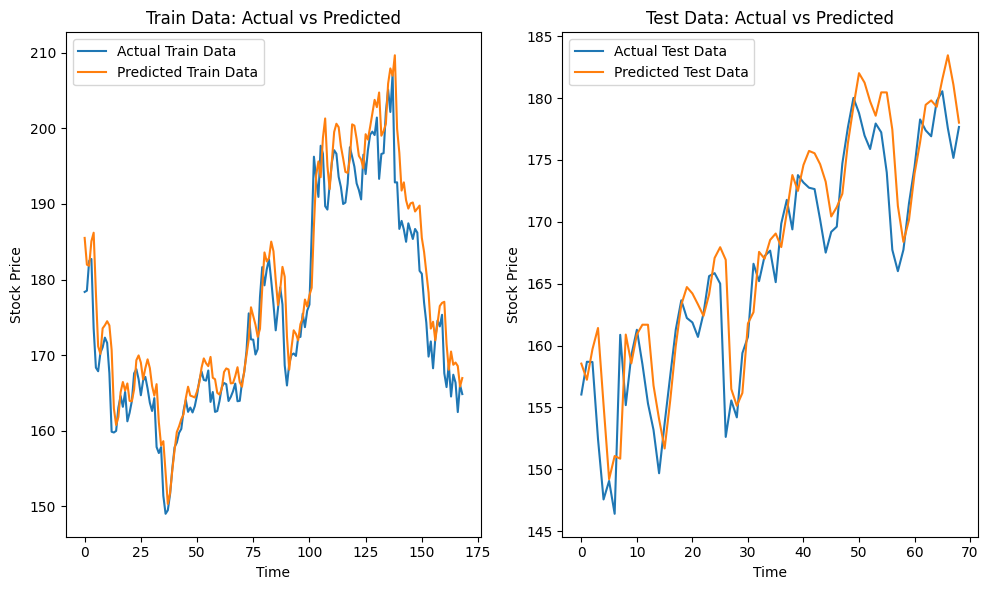

In [19]:
# Subplot train_predict and y_train_original side by side
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(y_train_original, label="Actual Train Data")
plt.plot(train_predict, label="Predicted Train Data")
plt.title("Train Data: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()

# Subplot test_predict and y_test_original
plt.subplot(1, 2, 2)
plt.plot(y_test_original, label="Actual Test Data")
plt.plot(test_predict, label="Predicted Test Data")
plt.title("Test Data: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()

plt.tight_layout()
plt.show()


### Evaluating Model Prediction Performance

In [20]:
# Calculate mean squared error
mse_train = mean_squared_error(y_train_original, train_predict)
print(f"Mean Squared Error on Train Data: {mse_train:.2f}")
mse_test = mean_squared_error(y_test_original, test_predict)
print(f"Mean Squared Error on Test Data: {mse_test:.2f}")

Mean Squared Error on Train Data: 20.14
Mean Squared Error on Test Data: 15.95


### Visualizing Output: TABULAR

In [21]:

# Calculate the difference for both train and test data
difference_train = y_train_original.ravel() - train_predict.ravel()
difference_test = y_test_original.ravel() - test_predict.ravel()


data1 = {'Date': Rawdata.index[-len(y_train_original):],
        'Actual': y_train_original.ravel(),
        'Predicted': train_predict.ravel(),
        'Difference': difference_train.ravel() }
df1 = pd.DataFrame(data1)

# Display the DataFrame
print(df1.to_string())

# Create a DataFrame (only for test data)
data = {'Date': Rawdata.index[-len(y_test_original):],
        'Actual': y_test_original.ravel(),
        'Predicted': test_predict.ravel(),
        'Difference': difference_test.ravel()}
df = pd.DataFrame(data)

# Display the DataFrame
print(df.to_string())



          Date      Actual   Predicted  Difference
0   2024-11-04  178.363739  185.507858   -7.144119
1   2024-11-05  178.532898  181.969345   -3.436447
2   2024-11-06  182.473999  181.830536    0.643463
3   2024-11-07  182.722794  185.075211   -2.352417
4   2024-11-08  173.536896  186.195358  -12.658463
5   2024-11-11  168.351791  178.257324   -9.905533
6   2024-11-12  167.874084  171.173660   -3.299576
7   2024-11-13  170.312378  170.159363    0.153015
8   2024-11-14  171.038895  173.549683   -2.510788
9   2024-11-15  172.322708  173.958984   -1.636276
10  2024-11-18  171.626053  174.492050   -2.865997
11  2024-11-19  167.595413  173.938095   -6.342682
12  2024-11-20  159.872498  170.684357  -10.811859
13  2024-11-21  159.772964  162.951324   -3.178360
14  2024-11-22  159.981964  160.768265   -0.786301
15  2024-11-25  163.057190  161.827408    1.229782
16  2024-11-26  164.599808  165.102966   -0.503159
17  2024-11-27  163.166687  166.452011   -3.285324
18  2024-11-29  165.137207  165

### Visualizing Predictions: Graphs

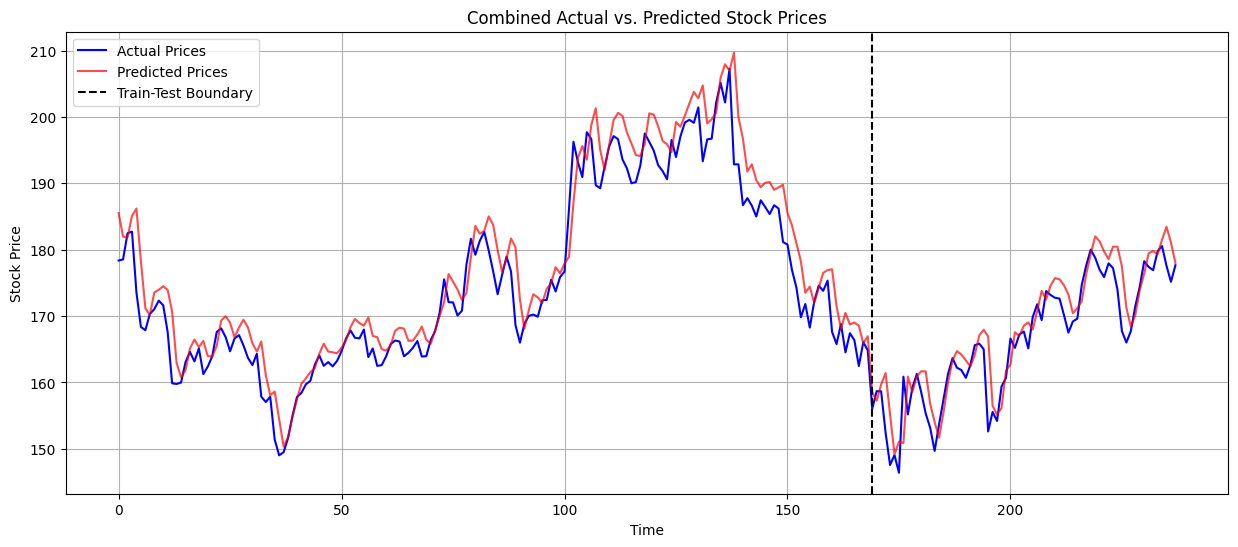

In [22]:
# Plot actual vs predicted prices
plt.figure(figsize=(15, 6))

# Combine actual price data from train and test
combined_actual = np.concatenate([y_train_original, y_test_original], axis=0)
#Combine predicted price data from train and test
combined_predicted = np.concatenate([train_predict, test_predict], axis=0)

# Plot difference between actual and predicted
difference = combined_actual.ravel() - combined_predicted.ravel()

# Plot in one Graph
plt.plot(combined_actual, label="Actual Prices", color="blue")
plt.plot(combined_predicted, label="Predicted Prices", color="red", alpha=0.7)
plt.axvline(x=len(y_train_original), color='black', linestyle='--', label='Train-Test Boundary')
plt.title("Combined Actual vs. Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend(loc='upper left')
plt.grid(True)

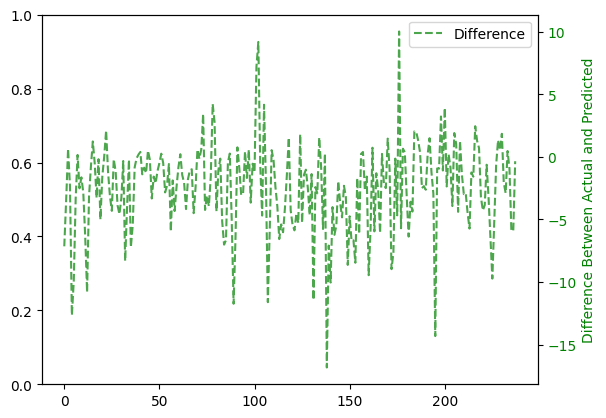

In [23]:
# Plot the difference between actual and predicted prices
ax2 = plt.gca().twinx()
ax2.plot(difference, label="Difference", color="green", linestyle='--', alpha=0.7)
ax2.set_ylabel('Difference Between Actual and Predicted', color='green')
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()

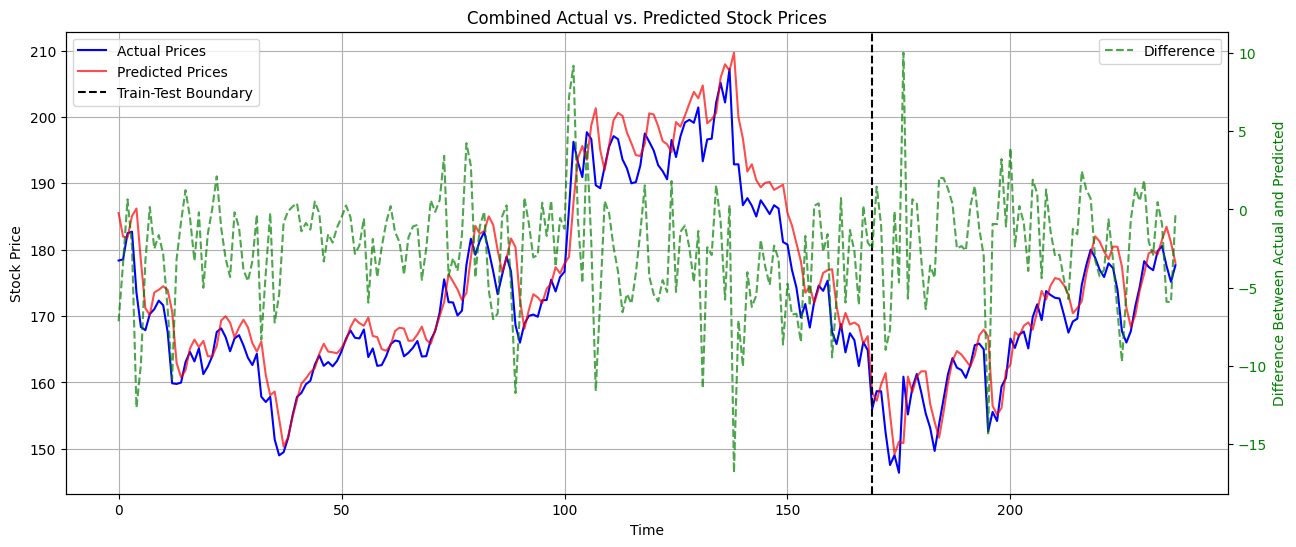

In [24]:
# Combining Graphs

# Plot actual vs predicted prices
plt.figure(figsize=(15, 6))

# Combine actual price data from train and test
combined_actual = np.concatenate([y_train_original, y_test_original], axis=0)
#Combine predicted price data from train and test
combined_predicted = np.concatenate([train_predict, test_predict], axis=0)

# Plot difference between actual and predicted
difference = combined_actual.ravel() - combined_predicted.ravel()

# Plot in one Graph
plt.plot(combined_actual, label="Actual Prices", color="blue")
plt.plot(combined_predicted, label="Predicted Prices", color="red", alpha=0.7)
plt.axvline(x=len(y_train_original), color='black', linestyle='--', label='Train-Test Boundary')
plt.title("Combined Actual vs. Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend(loc='upper left')
plt.grid(True)

# Plot the difference between actual and predicted prices
ax2 = plt.gca().twinx()
ax2.plot(difference, label="Difference", color="green", linestyle='--', alpha=0.7)
ax2.set_ylabel('Difference Between Actual and Predicted', color='green')
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()

### **Optional** Combining Graphs in Plotly

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Assume y_train_original, y_test_original, train_predict, test_predict are already defined

# Combine actual price data from train and test
combined_actual = np.concatenate([y_train_original, y_test_original], axis=0).ravel()
# Combine predicted price data from train and test
combined_predicted = np.concatenate([train_predict, test_predict], axis=0).ravel()
# Calculate the difference between actual and predicted prices
difference = combined_actual - combined_predicted

# Create a subplot with a secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces for actual and predicted prices
fig.add_trace(
    go.Scatter(x=np.arange(len(combined_actual)), y=combined_actual, mode='lines', name='Actual Prices', line=dict(color='blue')),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=np.arange(len(combined_predicted)), y=combined_predicted, mode='lines', name='Predicted Prices', line=dict(color='red', dash='dash')),
    secondary_y=False,
)

# Add a vertical line to indicate the train-test boundary
fig.add_shape(
    dict(
        type="line",
        x0=len(y_train_original),
        y0=min(combined_actual),
        x1=len(y_train_original),
        y1=max(combined_actual),
        line=dict(color="black", width=2, dash="dash"),
    )
)

# Add a trace for the difference between actual and predicted prices
fig.add_trace(
    go.Scatter(x=np.arange(len(difference)), y=difference, mode='lines', name='Difference', line=dict(color='green', dash='dot')),
    secondary_y=True,
)

# Update layout for titles and labels
fig.update_layout(
    title="Combined Actual vs. Predicted Stock Prices",
    xaxis_title="Time",
    yaxis_title="Stock Price",
    yaxis2_title="Difference Between Actual and Predicted",
)

# Show the plot
fig.show()


# To Practice at Home
##TODO: 1. Try with another stock

##TODO: 2. Try with different time periods

##TODO: 3. Change ANN parameters